In [156]:
import glob
import os
from voc_io import *
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 10)

In [102]:
def replace_at_index(tup, ix, val):
    lst = list(tup)
    lst[ix] = val
    return tuple(lst)

In [174]:
## read data
## read annot

def resize_gt(gt, srcSize=(1000,1000), targetSize = (416,416)):
    ratio_h = targetSize[0] / srcSize[0]
    ratio_w = targetSize[1] / srcSize[1]
    
    for i, g in enumerate(gt):
        new_pt = [(int(pts[0]*ratio_w), int(pts[1]*ratio_h)) for pts in g[1]]
        gt[i] = replace_at_index(g,1,new_pt)
        
    return gt
    
def get_size(pts):
    w = pts[2][0] - pts[0][0]
    h = pts[2][1] - pts[0][1]
    return w,h

def visualize_gt(folder, file):
    jpg = folder+"/"+ file+".jpg"
    xml = folder+"/"+ file+".xml"

    img = cv2.imread(jpg)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_src = img.copy()

    gt = PascalVocReader(xml).getShapes()
    for g in gt:
        cv2.rectangle(img, g[1][0], g[1][2], (255,0,0), 4)
        w,h = get_size(g[1])
        text = "%dx%d"%(w,h)
        cv2.putText(img, text, g[1][0], cv2.FONT_HERSHEY_PLAIN, 4, (0,0,255), 6)

    plt.subplot(121)
    plt.imshow(img)
    plt.title("ori")

    targetSize = (416,416)
    srcSize = img_src.shape[:2]
    img_416 = cv2.resize(img_src, targetSize)
    gt_416 = resize_gt(gt, srcSize, targetSize)
    
    for g in gt_416:
        cv2.rectangle(img_416, g[1][0], g[1][2], (255,0,0), 2)
        w,h = get_size(g[1])
        text = "%dx%d"%(w,h)
        cv2.putText(img_416, text, g[1][0], cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 2)


    plt.subplot(122)
    plt.imshow(img_416)
    plt.title("416")

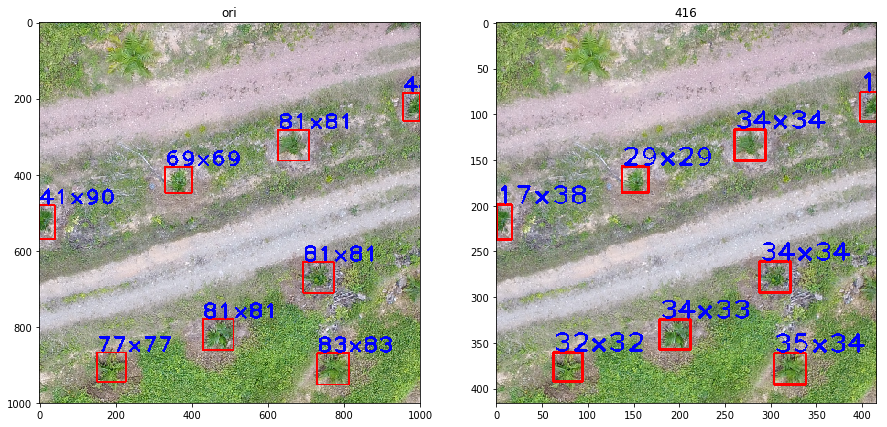

In [175]:
## visualize ori
## visualize resized
folder = "/Users/ckh/OneDrive - Default Directory/Hui_Wan/Sample_Anno_Data_NPT"
file = "18_GSKE_Sungai_Pin_4_ytl_0000"
visualize_gt(folder, file)

In [181]:
## Statistic
bb_sizes = []
for p in glob.glob(folder+"/*.xml"):
    gt = PascalVocReader(p).getShapes()
    for g in gt:
        w,h = get_size(g[1])
        bb_sizes.append([w,h])
        
bb_sizes = np.array(bb_sizes)

Text(0.5, 1.0, 'W:(4,62) H:(19,62)')

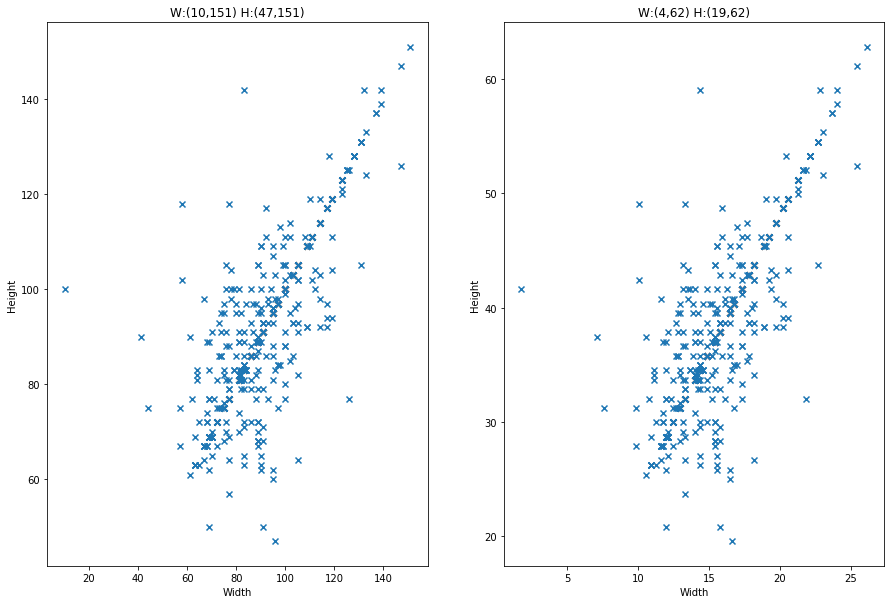

In [190]:
plt.subplot(121)
plt.scatter(bb_sizes[:,0], bb_sizes[:,1], marker='x')
plt.xlabel("Width")
plt.ylabel("Height")
w_min, w_max = min(bb_sizes[:,0]), max(bb_sizes[:,0])
h_min, h_max = min(bb_sizes[:,1]), max(bb_sizes[:,1])
plt.title( "W:(%d,%d) H:(%d,%d)"%(w_min, w_max,h_min,h_max) )

plt.subplot(122)
ratio = 416 / 1000
bb_sizes_416 = bb_sizes*ratio
plt.scatter(bb_sizes_416[:,0]*ratio, bb_sizes_416[:,1], marker='x')
plt.xlabel("Width")
plt.ylabel("Height")
w_min, w_max = min(bb_sizes_416[:,0]), max(bb_sizes_416[:,0])
h_min, h_max = min(bb_sizes_416[:,1]), max(bb_sizes_416[:,1])
plt.title( "W:(%d,%d) H:(%d,%d)"%(w_min, w_max,h_min,h_max) )

In [221]:
## Mosaic
from ref.pytorchYOLOv4 import dataset as ds

<module 'ref.pytorchYOLOv4.dataset' from '/Users/ckh/Documents/Poladrone/nb/ref/pytorchYOLOv4/dataset.py'>

In [ ]:
## visualize mosaic result

In [ ]:
## torch dataloader

In [ ]:
## visualize dataloader output